### Mobile Price Prediction


### 1]Decision Tree
### 2]Random Forest
### 3]SVM

In [1]:
! pip install pgeocode
!pip install 'numpy>=1.16.5,<1.23.0'
import pgeocode
import itertools 
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm
import plotly.express as px
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import plot
import plotly.figure_factory as ff
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from plotly.subplots import make_subplots
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV

The system cannot find the file specified.


In [2]:
df = pd.DataFrame(pd.read_csv('datasets_11167_15520_train.csv'))
df

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1996    0.2        187        4  ...        915      1965  2032    11    10   
1997    0.7        108        8  ...        868      1632  3057     9     1   
1998    0.1        145        5  ...        336       670   869    18    10   
1999    0.9        168        6  ...        483       754  3919    19     4   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
...         ...      ...           ...   ...          ...  
1995         19        1             1     0            0  
1996         16        1             1     1            2  
1997          5        1             1     0            3  
1998         19        1             1     1            0  
1999          2        1             1     1            3  

[2000 rows x 21 columns]

Data information

*battery_power: Total energy a battery can store in one time measured in mAh

*blue: Has bluetooth or not

*clock_speed: speed at which microprocessor executes instructions

*dual_sim : Has dual sim support or not

*fc: Front Camera mega pixels

*four_g: Has 4G or not

*int_memory : Internal Memory in Gigabytes 

*m_dep: Mobile Depth in cm

*mobile_wt: Weight of mobile phone

*n_cores: Number of cores of processor

*pc: Primary Camera mega pixels 

*px_height: Pixel Resolution Height

*px_width: Pixel Resolution Width

*ram: Random Access Memory in Mega Bytes

*Sc_h: Screen Height of mobile in cm

*Sc_w: Screen Width of mobile in cm

*talk_time: longest time that a single battery charge will last when you are

*three_g: Has 3G or not

*touch_screen: Has touch screen or not

*wifi : Has wifi or not

*price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).

In [3]:
df.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

###  Fortunately there's not any duplicates or missing values 

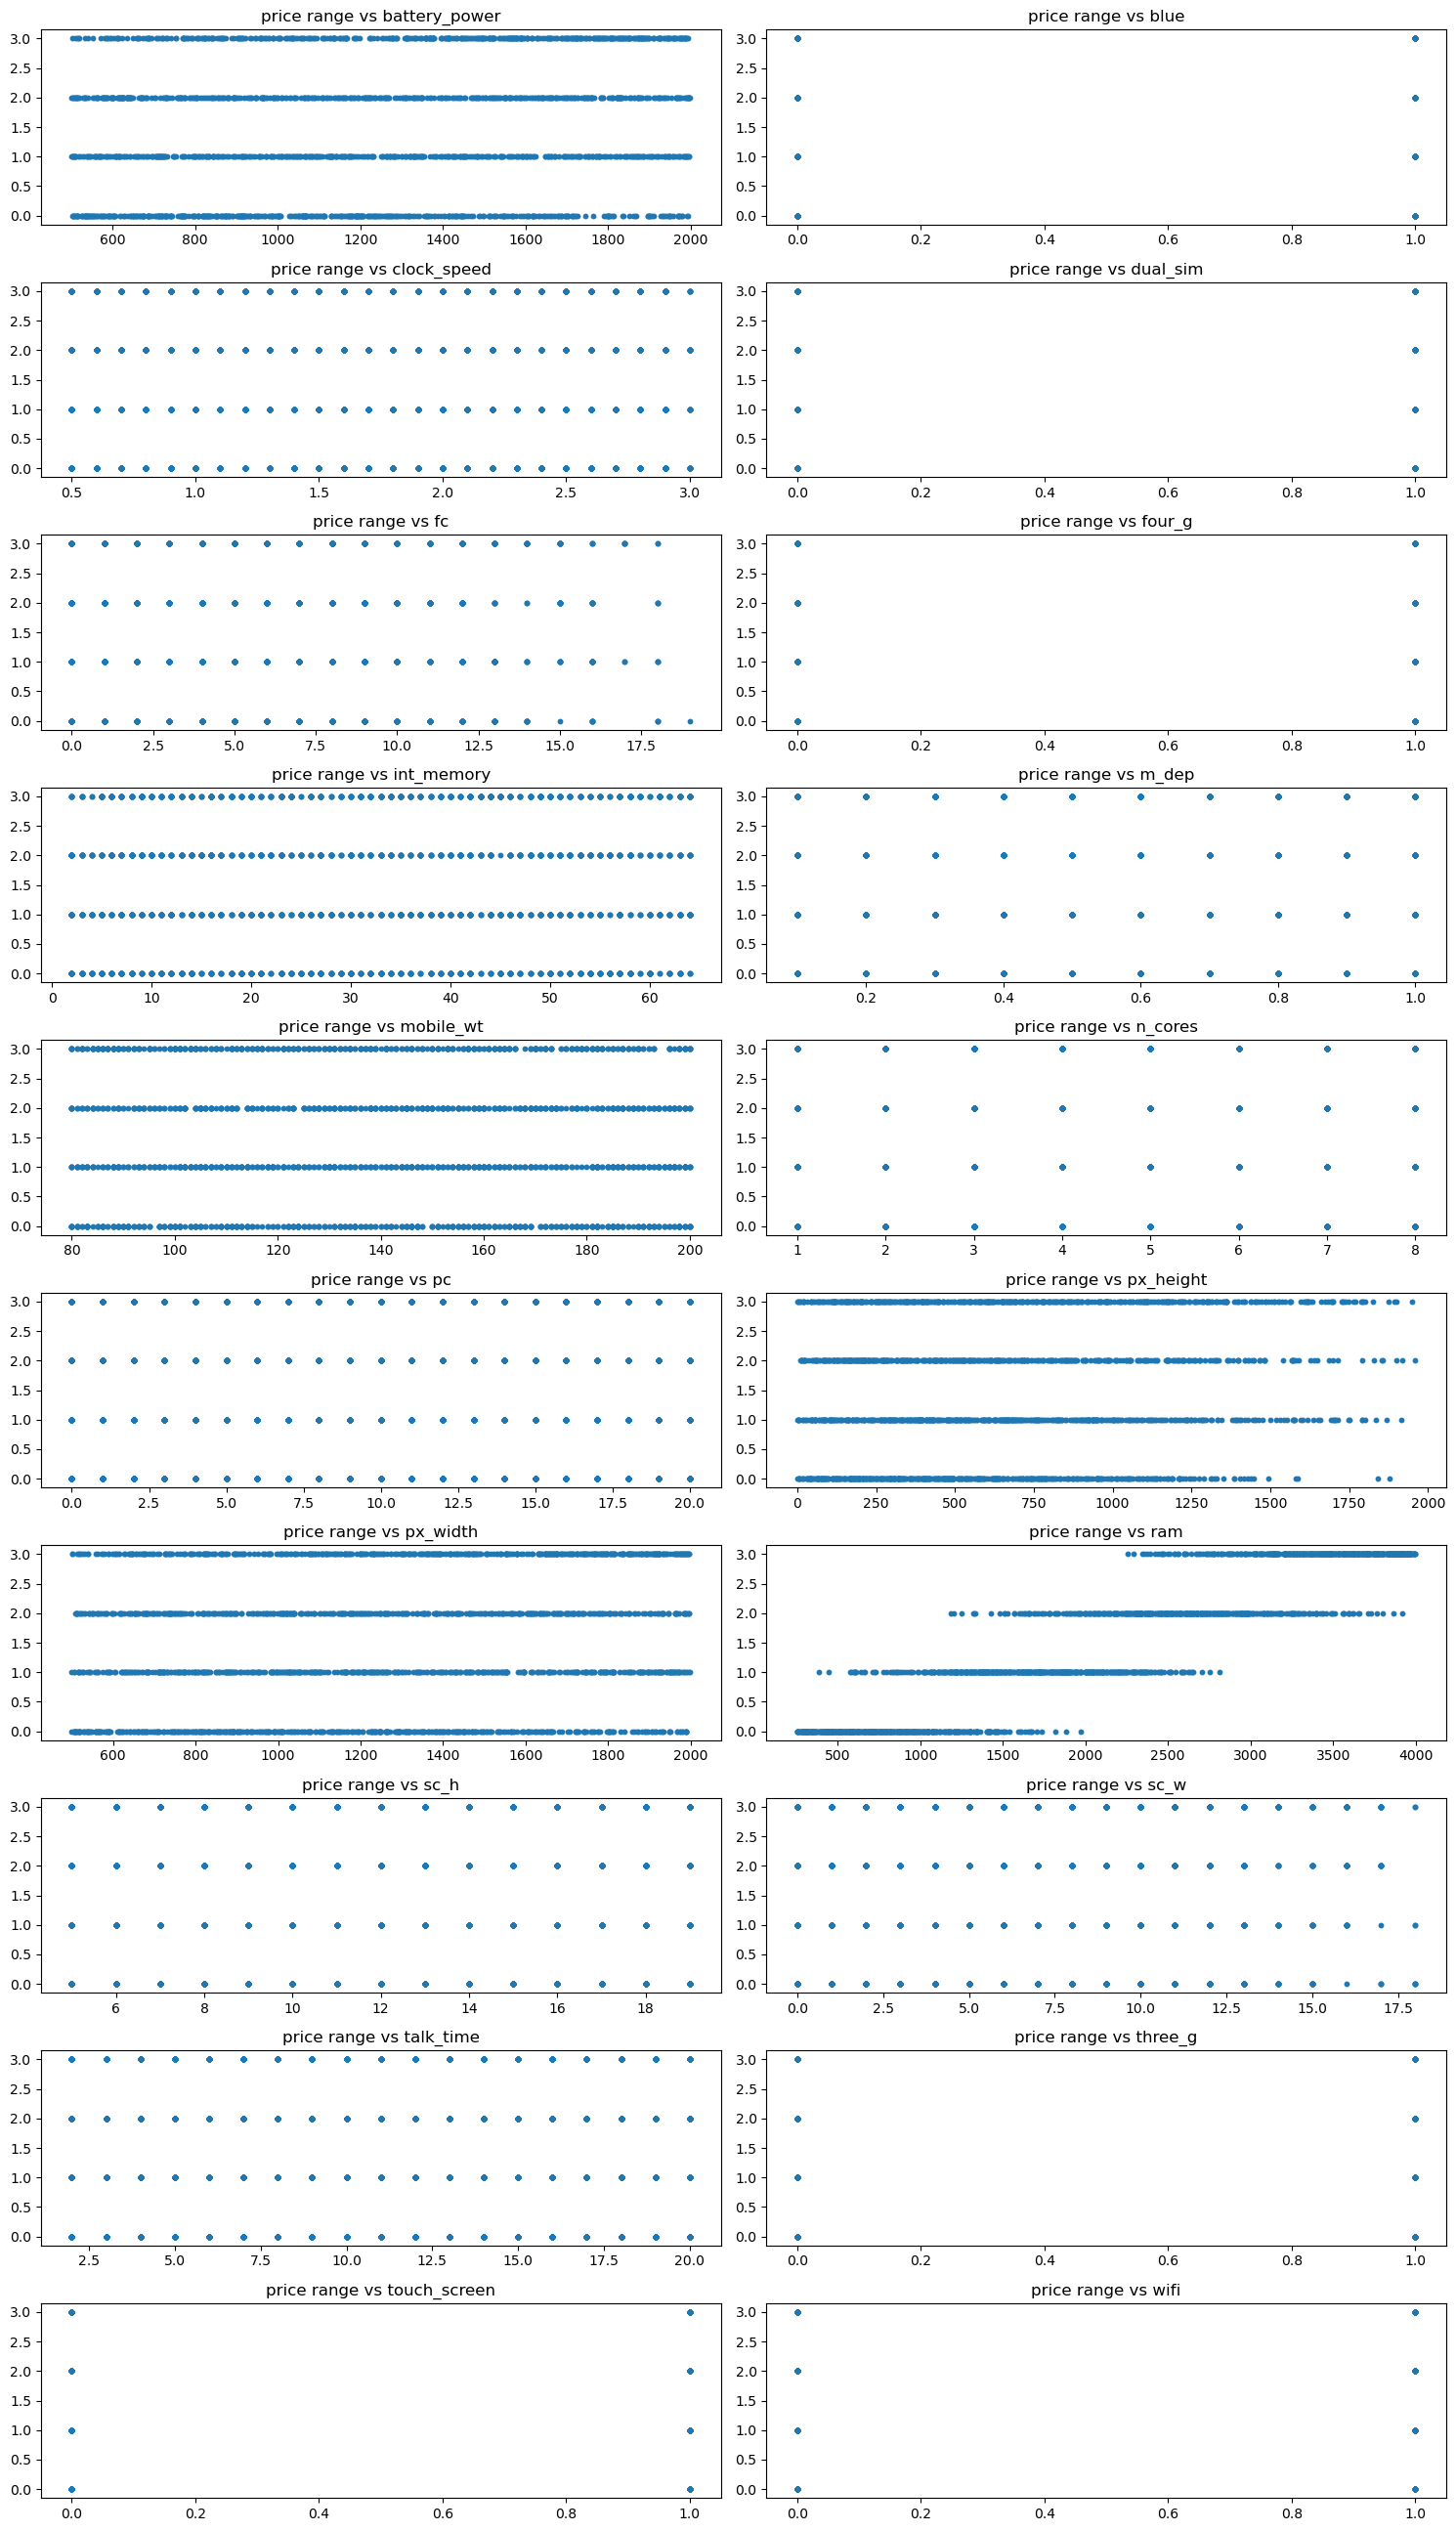

In [7]:
df2 = df.drop(columns=['price_range'])
fig, axs = plt.subplots(10, 2, figsize=(15, 26))
j = 0
for i in range(len(df2.columns)):
    axs[i//2, j].scatter(df2[df2.columns[i]], df['price_range'], s=10)
    axs[i//2, j].set_title(f"price range vs {df2.columns[i]}")
    j = 1 if j == 0 else 0
    fig.tight_layout()

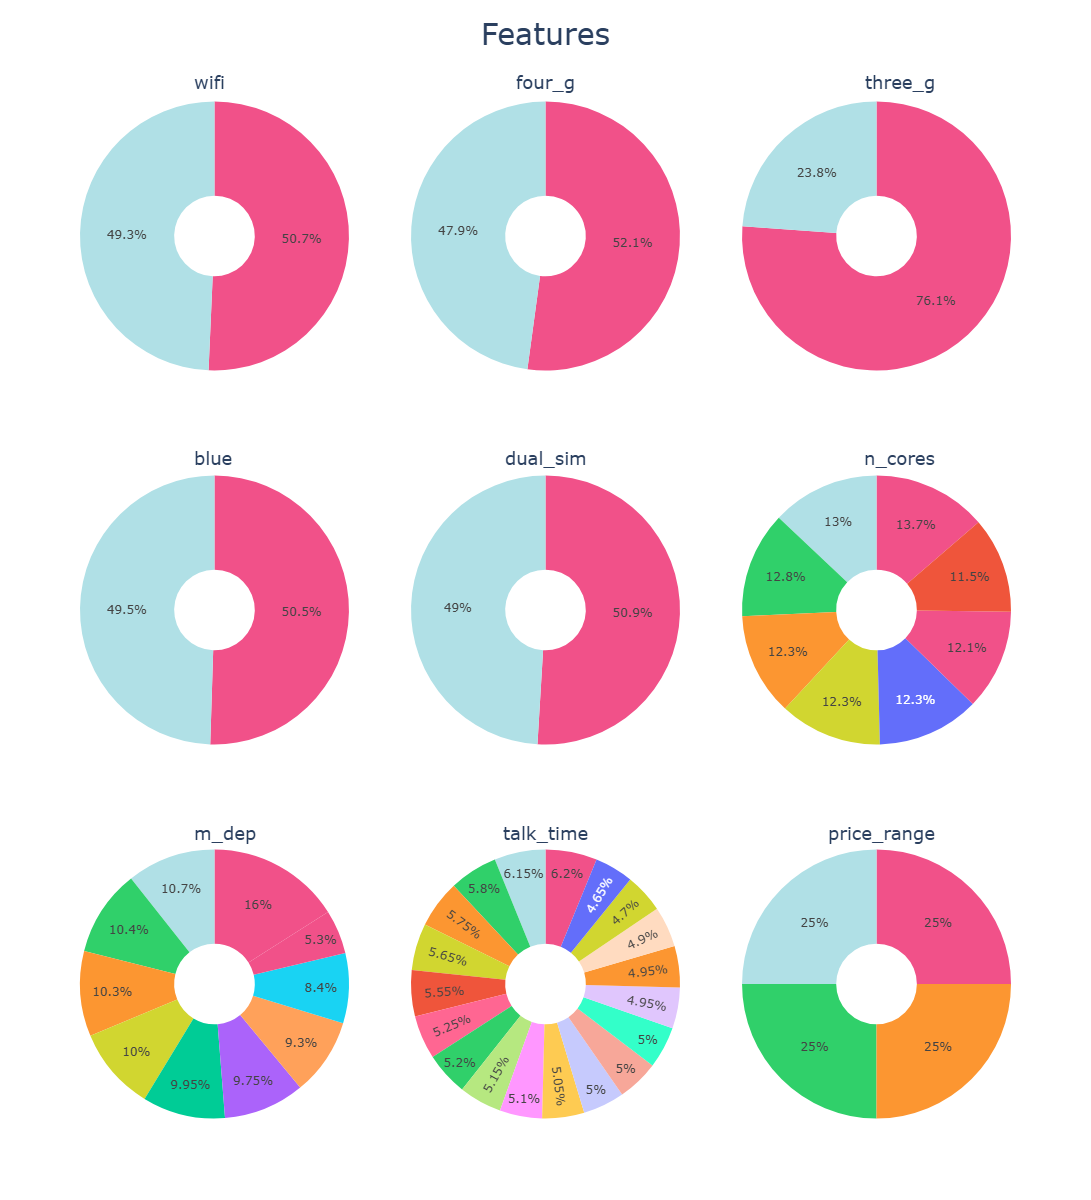

In [8]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
# Create subplots with 2 rows and 3 columns
fig = make_subplots(rows=3, cols=3, specs=[[{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
                                           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}],
                                           [{'type': 'domain'}, {'type': 'domain'}, {'type': 'domain'}]])

annotations = []
x_coordinates = [0.12, 0.5, 0.92] # change the x-coordinate for each row
y_coordinates = [1.03, 0.65, 0.27] # change the y-coordinate for each row
colors = ['#F15189', '#B0E0E6', '#30D06A', '#FC9631', '#D1D630']
features = ['wifi', 'four_g', 'three_g', 'blue', 'dual_sim', 'n_cores', 'm_dep', 'talk_time', 'price_range']
# Add pie charts to each subplot
for i in range(len(features)):
    fig.add_trace(go.Pie(labels=df[features[i]].value_counts().index.tolist(), values=np.asarray(df[features[i]].value_counts()), hole=.3, marker=dict(colors=colors), name=features[i]), row=(i//3)+1, col=(i%3)+1)
    annotations.append(dict(text=f'{features[i]}',
                            x=x_coordinates[i%3],
                            y=y_coordinates[i//3],
                            font=dict(size=18),
                            showarrow=False))
        
# Update layout
fig.update_layout(height=1200, width=1000, title={'text': "Features", 'font': {'size': 30}, 'x': 0.5, 'y':0.98}, annotations=annotations)
fig.update_layout(showlegend=False)
# Show figure
fig.show()

### As we can see, the labels (price range) are equally distributed and we have exactly 25% of each
#### Also other features are showing the same behavior except for "3G" which is mostly 1 rather than 0

C:\Users\YASH FATKAR\AppData\Local\Temp\ipykernel_9952\1356844159.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\YASH FATKAR\AppData\Local\Temp\ipykernel_9952\1356844159.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\YASH FATKAR\AppData\Local\Temp\ipykernel_9952\1356844159.py:4: UserWarning:


The palette list has fewer values (7) than needed (26) and will cycle, which may produce an uninterpretable plot.

C:\Users\YASH FATKAR\AppData\Local\Temp\ipykernel_9952\1356844159.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


C:\Users\YASH FATKAR\AppDat

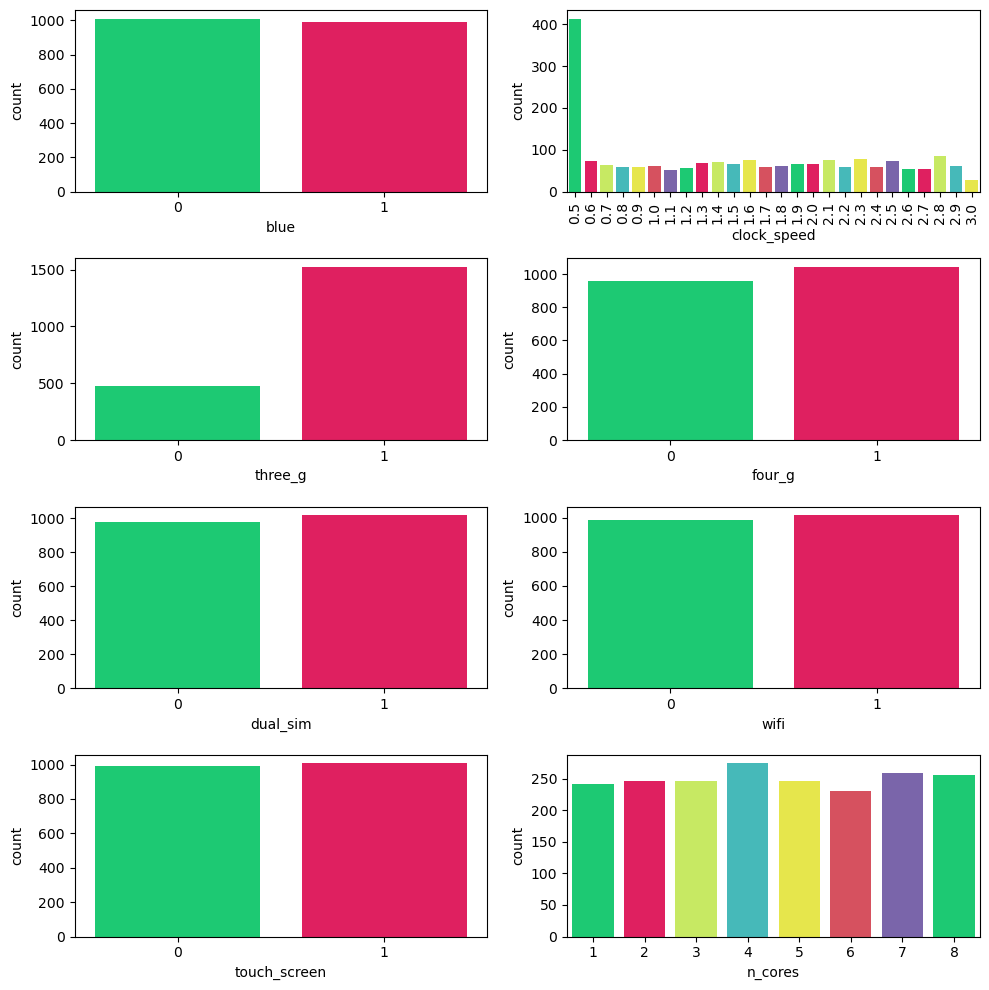

In [9]:
colors = ['#00e673', '#ff0055', '#d2ff4d', '#33cccc', '#FFFF33', '#EC3B4E', '#7559B6']
fig, ax = plt.subplots(4,2, figsize=(10,10))
sns.countplot(x='blue', data=df, ax=ax[0,0], palette=colors[:len(df['blue'].unique())])
sns.countplot(x='clock_speed', data=df, ax=ax[0,1], palette=colors[:len(df['clock_speed'].unique())])
sns.countplot(x='three_g', data=df, ax=ax[1,0], palette=colors[:len(df['three_g'].unique())])
sns.countplot(x='four_g', data=df, ax=ax[1,1], palette=colors[:len(df['four_g'].unique())])
sns.countplot(x='dual_sim', data=df, ax=ax[2,0], palette=colors[:len(df['dual_sim'].unique())])
sns.countplot(x='wifi', data=df, ax=ax[2,1], palette=colors[:len(df['wifi'].unique())])
sns.countplot(x='touch_screen', data=df, ax=ax[3,0], palette=colors[:len(df['touch_screen'].unique())])
sns.countplot(x='n_cores', data=df, ax=ax[3,1], palette=colors[:len(df['n_cores'].unique())])

ax[0,1].tick_params(axis='x', labelsize=10)
ax[0,1].set_xticklabels(ax[0,1].get_xticklabels(), rotation=90)

fig.tight_layout()

### The same thing can be seen here, in countplots. The only thing that is added, is "clock speed" which is showing anomaly in 0.5 

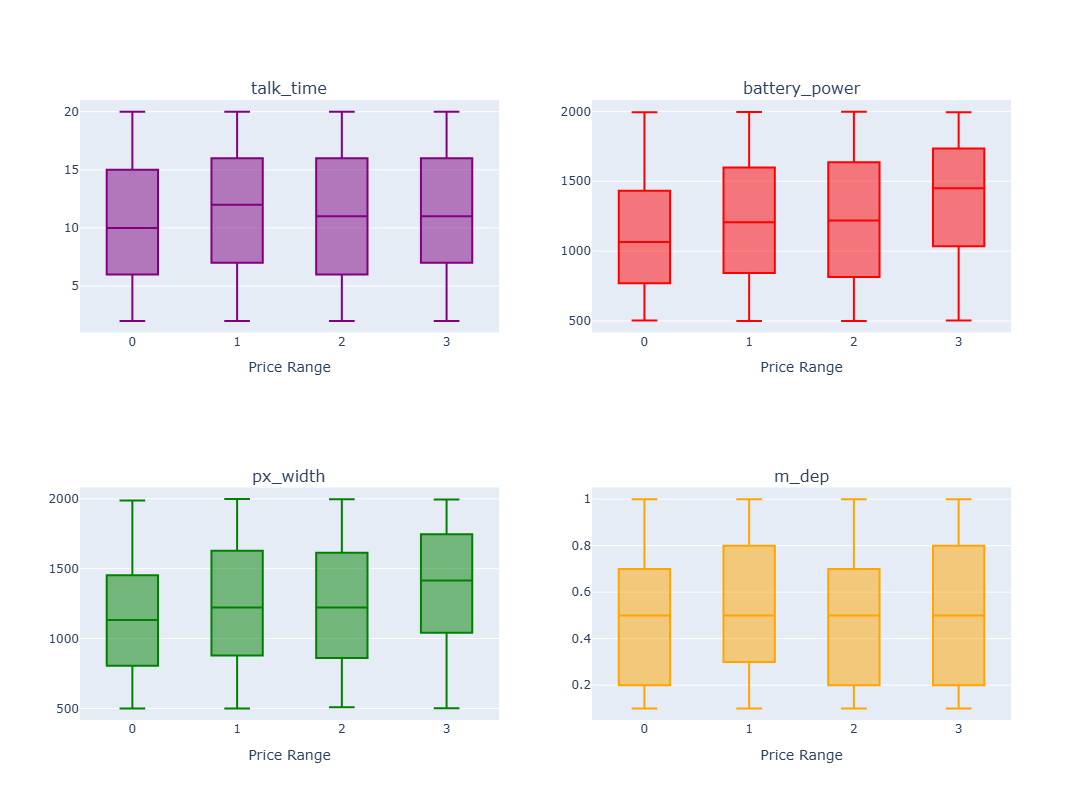

In [10]:
fig = make_subplots(rows=2, cols=2, subplot_titles=('talk_time', 'battery_power', 'px_width', 'm_dep'))

for i in range(4):
    fig.add_trace(go.Box(y=df[df['price_range'] == i]['talk_time'], name=f'{i}', marker_color='purple'), row=1, col=1)
    fig.add_trace(go.Box(y=df[df['price_range'] == i]['battery_power'], name=f'{i}', marker_color='red'), row=1, col=2)
    fig.add_trace(go.Box(y=df[df['price_range'] == i]['px_width'], name=f'{i}', marker_color='green'), row=2, col=1)
    fig.add_trace(go.Box(y=df[df['price_range'] == i]['m_dep'], name=f'{i}', marker_color='orange'), row=2, col=2)

fig.update_layout(height=800, width=900)
fig.update_traces(showlegend=False)
fig.update_xaxes(title_text="Price Range", row=1, col=1)
fig.update_xaxes(title_text="Price Range", row=1, col=2)
fig.update_xaxes(title_text="Price Range", row=2, col=1)
fig.update_xaxes(title_text="Price Range", row=2, col=2)
fig.show()

### In the following plot we see that the higher the price of a cell phone is, the more battery power it probably has

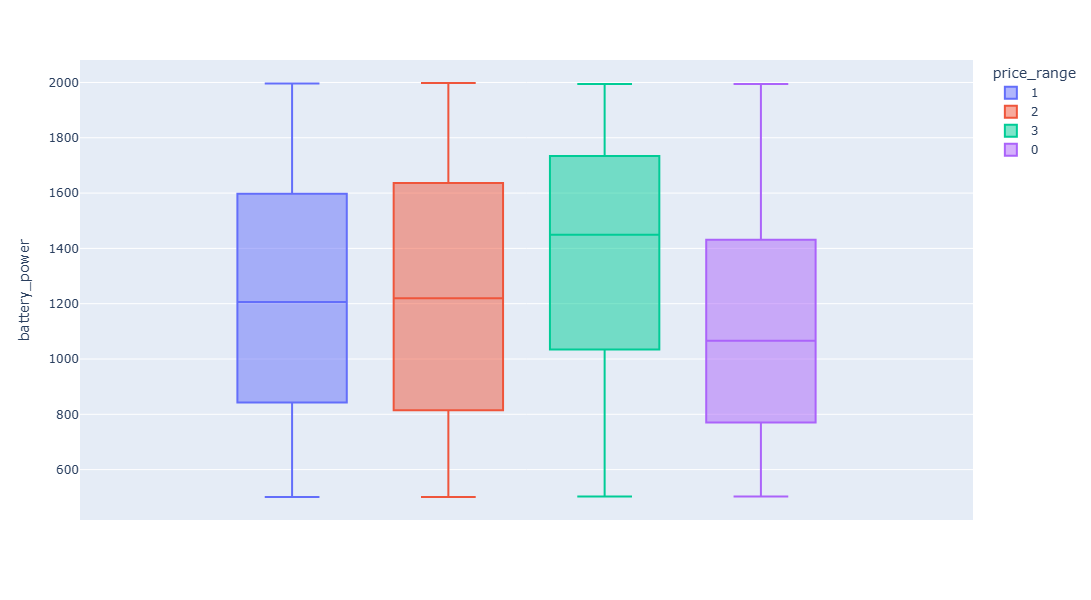

In [11]:
fig = px.box(df, y='battery_power', color='price_range')
fig.update_layout(
    height=600,  # set the height in pixels
    width=600    # set the width in pixels
)
fig.show()

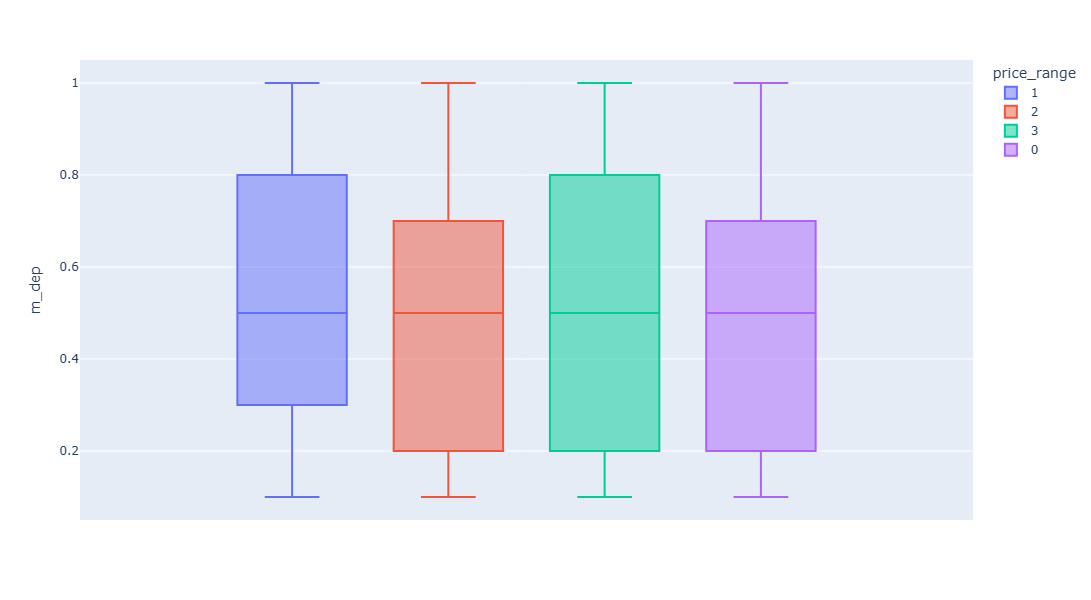

In [12]:
fig = px.box(df, y='m_dep', color='price_range')
fig.update_layout(
    height=600,  # set the height in pixels
    width=600    # set the width in pixels
)
fig.show()

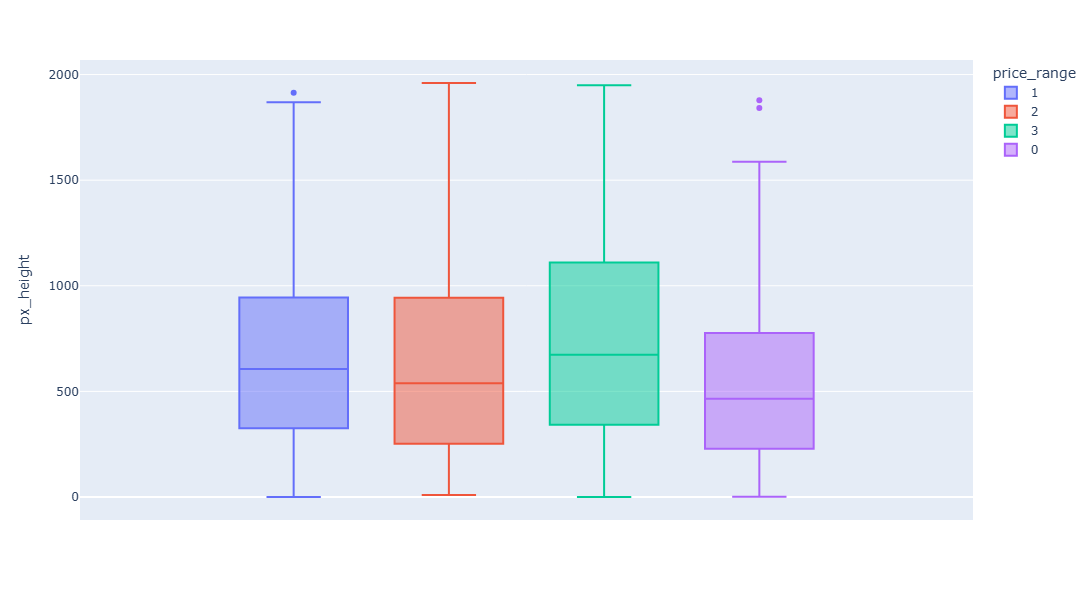

In [13]:
fig = px.box(df, y='px_height', color='price_range')
fig.update_layout(
    height=600,  # set the height in pixels
    width=600    # set the width in pixels
)
fig.show()

### This plot is noticeably different from the previous ones, there's a direct relationship between cell phone 'ram' and its 'price'

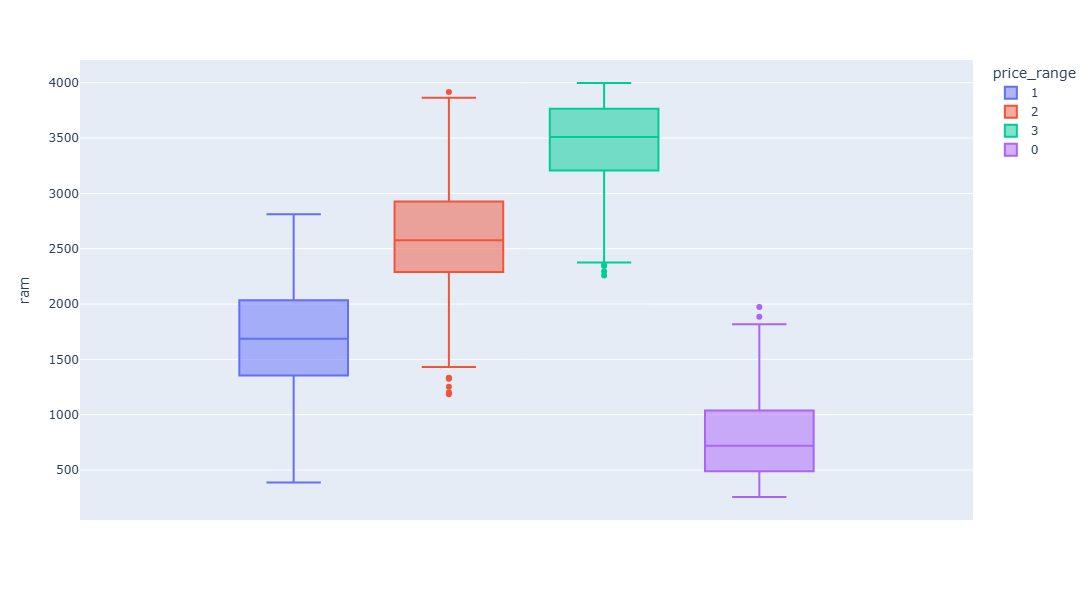

In [14]:
fig = px.box(df, y='ram', color='price_range')
fig.update_layout(
    height=600,  # set the height in pixels
    width=600    # set the width in pixels
)
fig.show()

### As we're all aware of this, the minimum depth one can imagine for a cellphone is 0.3 not less! But if we label those samples with m_dep less than 0.3 as noise, then we're going to lose half of our data, so instead we prefer to drop the column and see if the result improves or not.

## Later update: the result didn't get better so for the final model we use all of the features

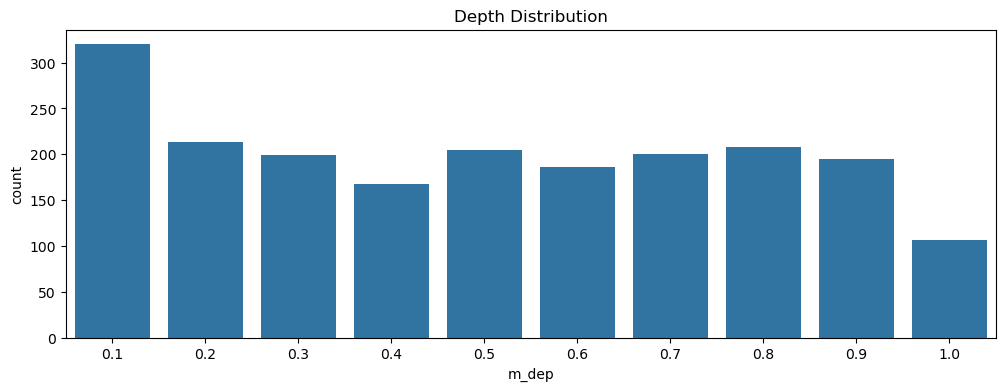

In [15]:
plt.figure(figsize=(12,4))
sns.countplot(x='m_dep', data=df)
plt.xticks(rotation=0)
plt.title('Depth Distribution')
plt.show()

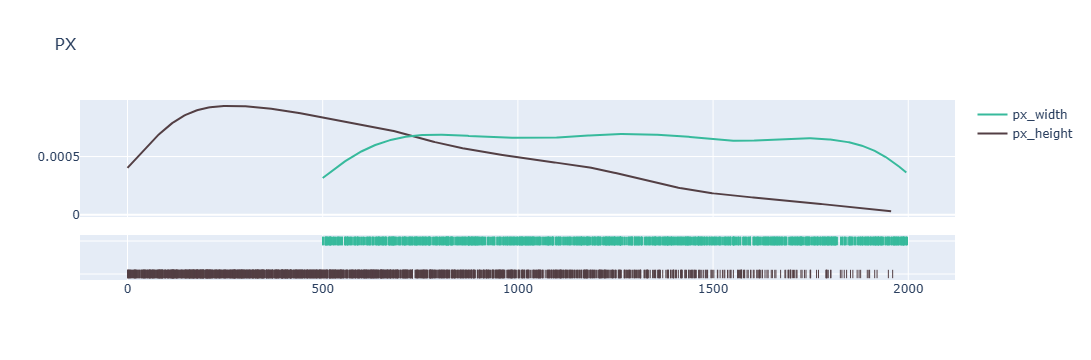

In [16]:
labels = ['px_height', 'px_width']
hist_data = [df[x] for x in labels]
colors = ['#533F44', '#37bA9C']

# Create distplot with curve_type set to 'normal'
fig = ff.create_distplot(hist_data, labels, show_hist=False, colors=colors)

# Add title
fig.update_layout(title_text='PX')
fig.show()

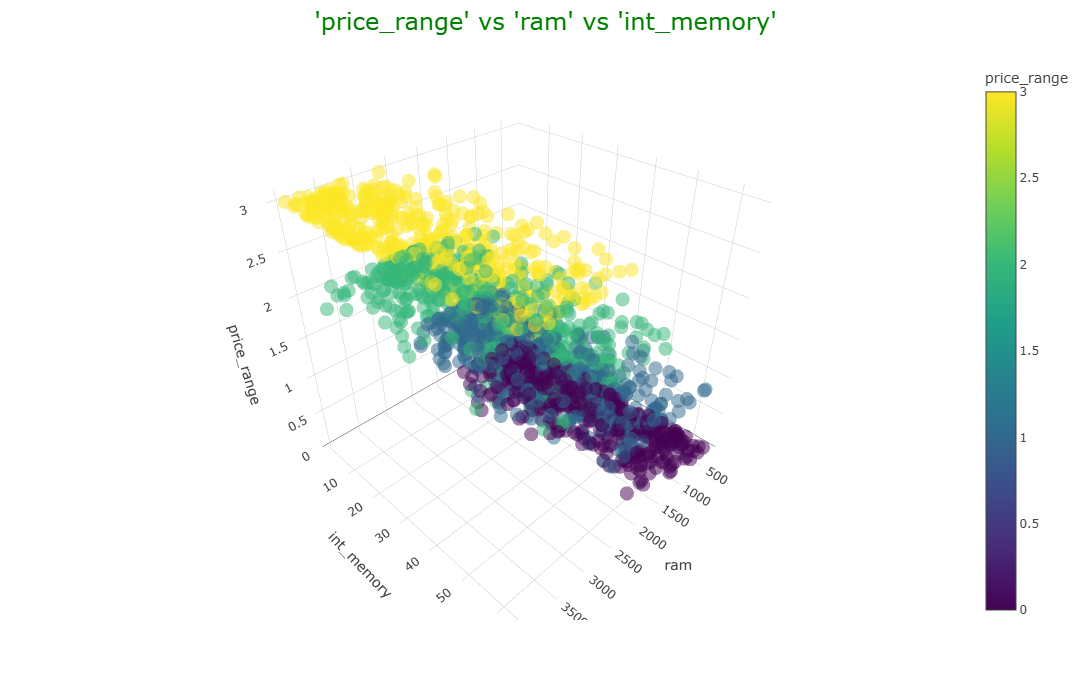

In [17]:
def Scatter3d(x='ram', y='int_memory', z='price_range', color='price_range'):
    fig = px.scatter_3d(df, x=x, y=y, z=z, color=color, template='gridon', opacity=0.5)
    fig.update_layout(width=700, height=700, title={'text': f"'{z}' vs '{x}' vs '{y}'", 'font': {'size': 24, 'color': 'green'}})
    fig.show()
Scatter3d()

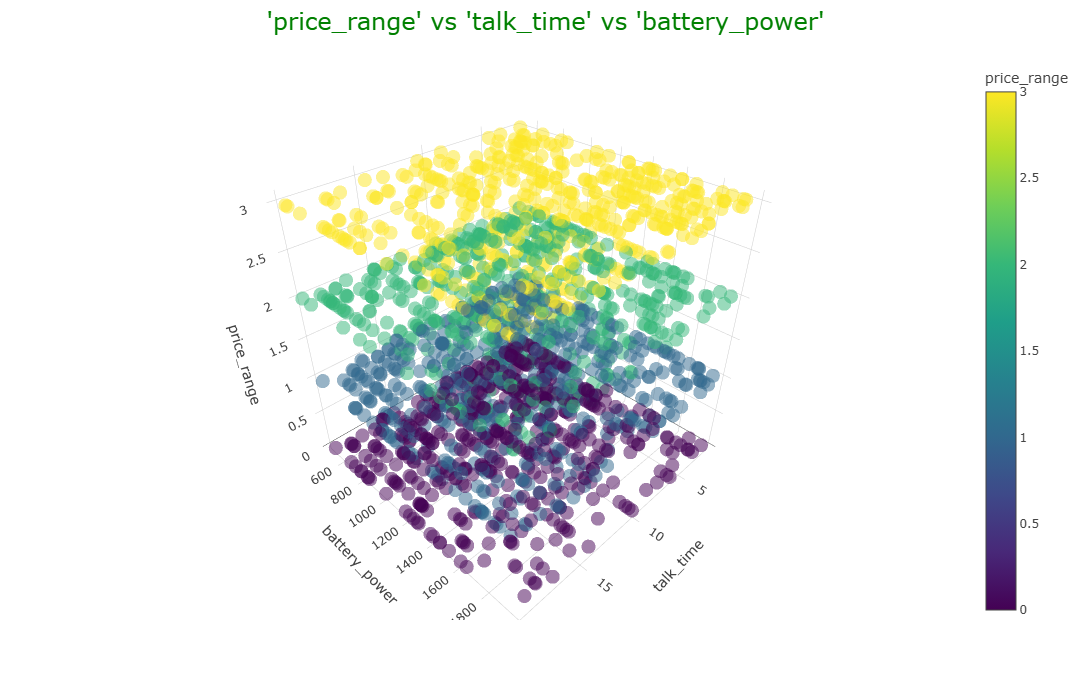

In [18]:
Scatter3d(x='talk_time', y='battery_power')

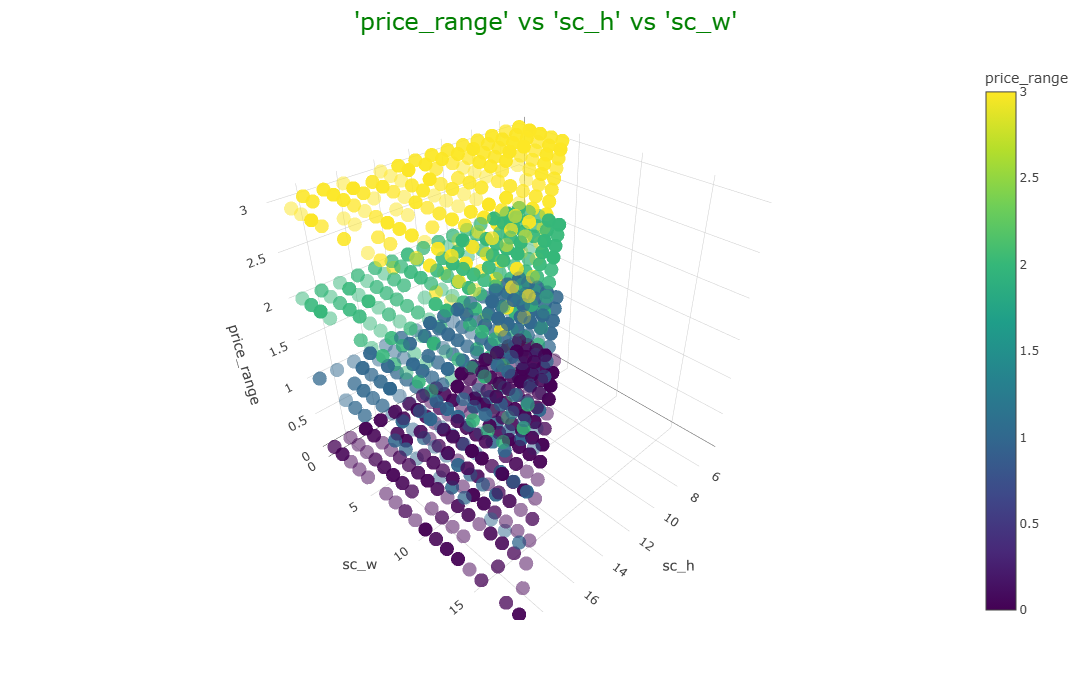

In [19]:
Scatter3d(x='sc_h', y='sc_w')

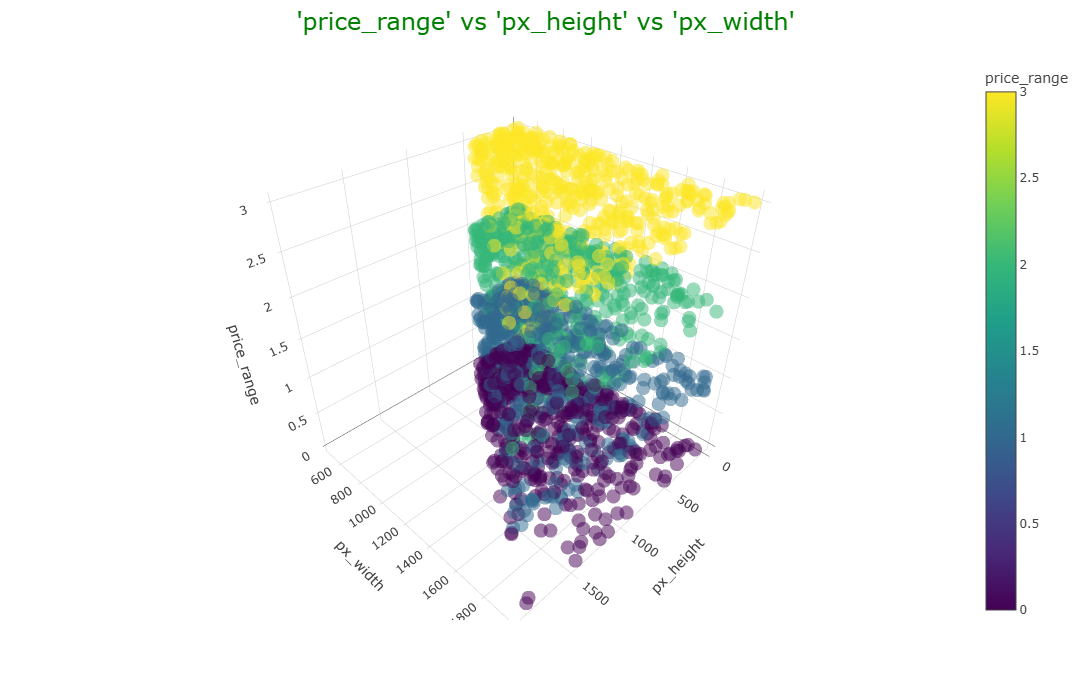

In [20]:
Scatter3d(x='px_height', y='px_width')

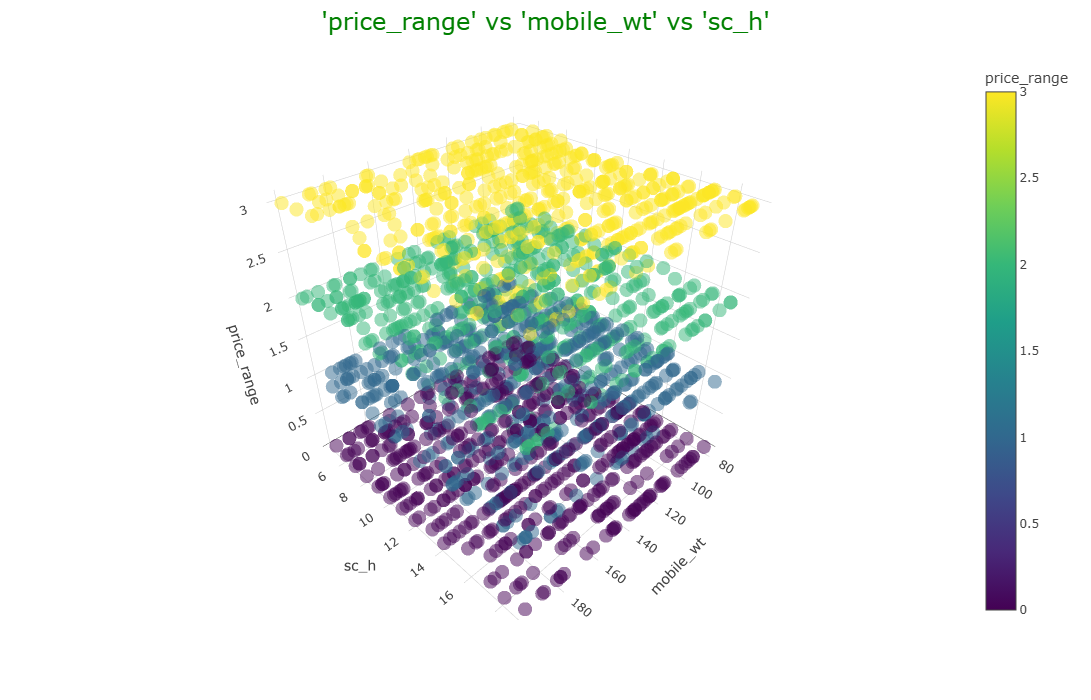

In [21]:
Scatter3d(x='mobile_wt', y='sc_h')

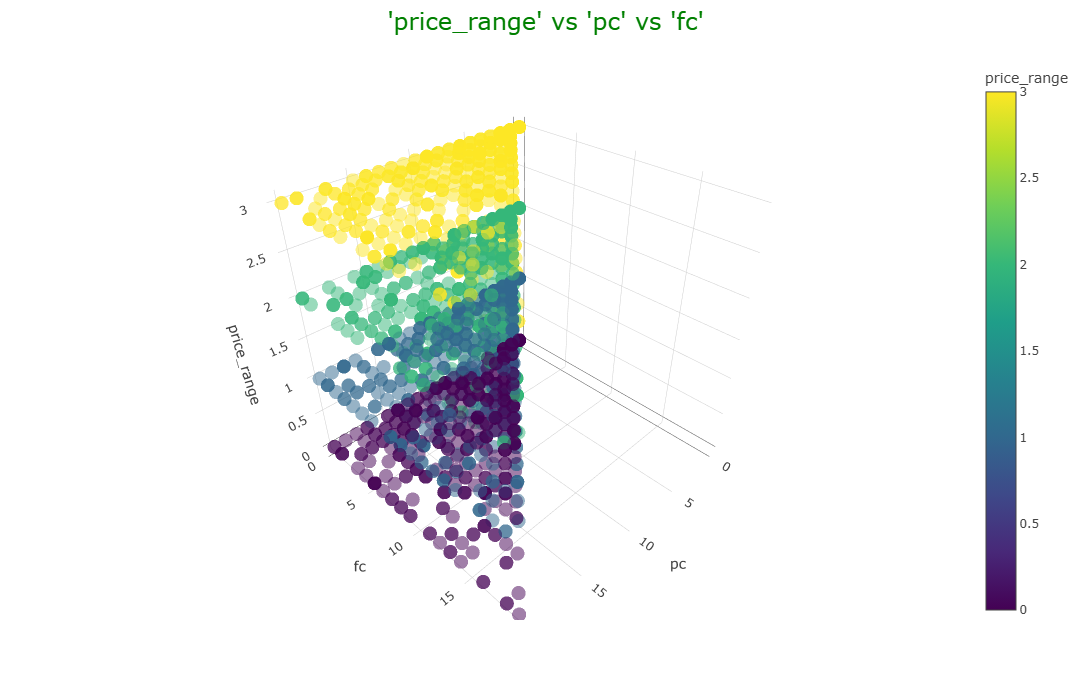

In [22]:
Scatter3d(x='pc', y='fc')

### This scatter plot shows that the values of cell phones' heigh and width are not normal, but since the whole dataset might not be a real one, we keep them all

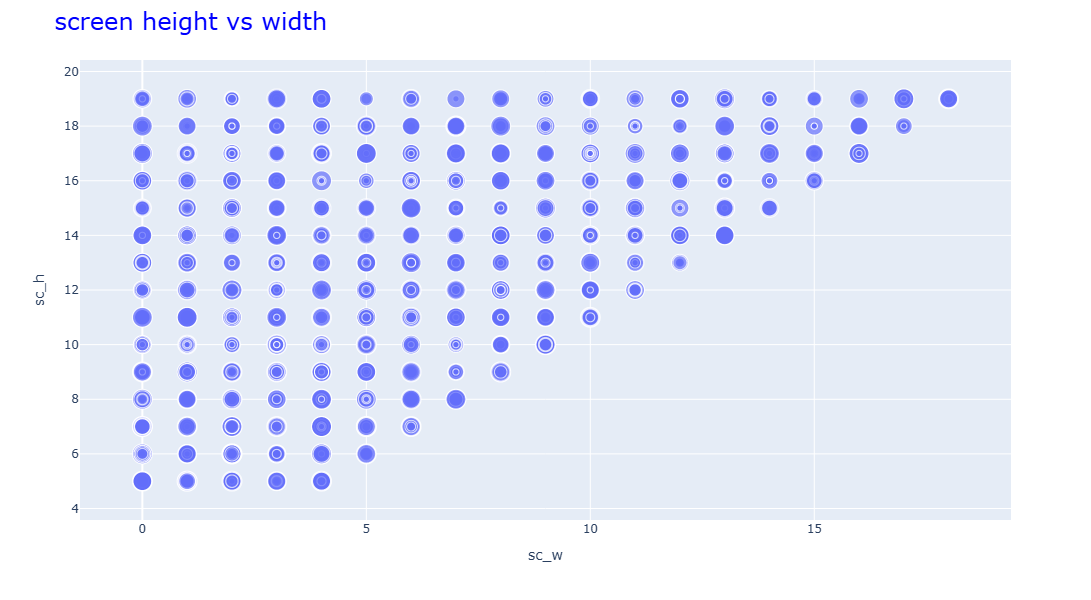

In [23]:
fig = px.scatter(df, x="sc_w", y="sc_h", size='m_dep', size_max=20)
fig.update_layout(width=700, height=600, title={'text': f"screen height vs width", 'font': {'size': 24, 'color': 'blue'}})
fig.show()

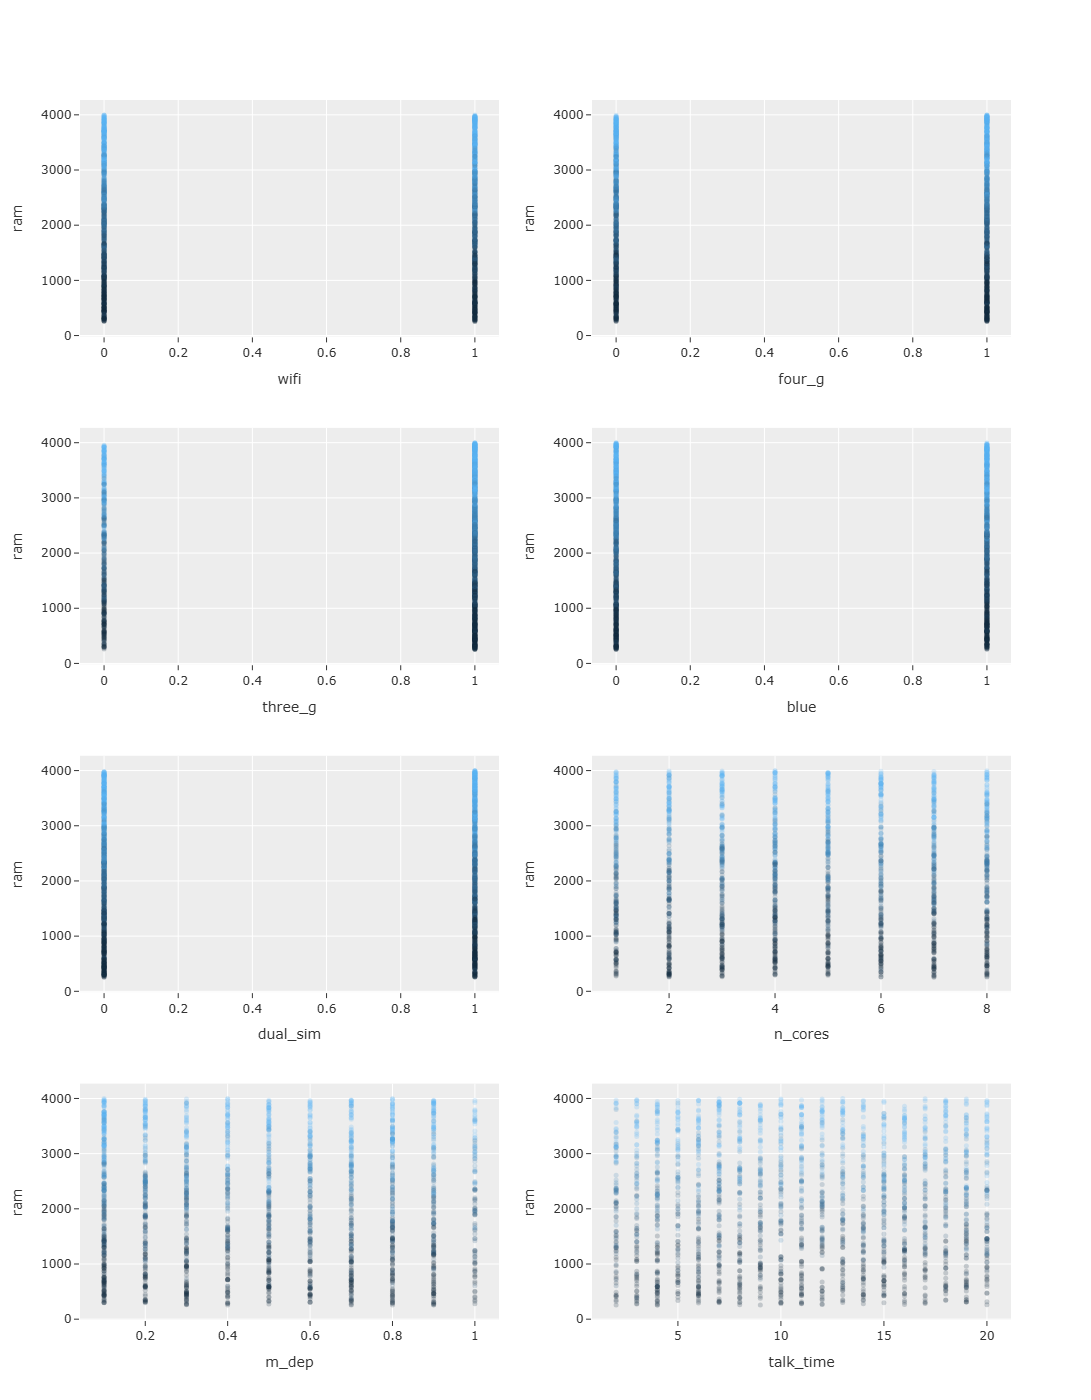

In [24]:
# Create subplots
fig = make_subplots(rows=4, cols=2)

# Define plot traces
traces = []
features = ['wifi', 'four_g', 'three_g', 'blue', 'dual_sim', 'n_cores', 'm_dep', 'talk_time']
for i in range(len(features)):
    traces.append(go.Scatter(y=df['ram'], x=df[features[i]], mode='markers',
                             marker=dict(size=5, opacity=0.2, color=df['price_range']),
                             name=features[i]))
    fig.add_trace(traces[i], row=(i//2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text=features[i], row=(i//2)+1, col=(i%2)+1)
    fig.update_yaxes(title_text='ram', row=(i//2)+1, col=(i%2)+1)

# Update layout
fig.update_layout(height=1400, width=1000, template='ggplot2', showlegend=False)

# Show figure
fig.show()

There's no cell phone that has 4G without having 3G (which makes total sence)

In [25]:
df[(df['three_g']==0) & (df['four_g']==1)]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

There're 240 samples that have wifi but no 3G!

In [26]:
df[(df['three_g']==0) & (df['wifi']==1)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
19              682     1          0.5         0   4       0          19   
22             1949     0          2.6         1   4       0          47   
30             1579     1          0.5         1   0       0           5   
45             1514     0          2.9         0   0       0          27   
...             ...   ...          ...       ...  ..     ...         ...   
1956            555     1          0.5         1   2       0          17   
1966           1583     0          1.2         1   0       0          14   
1981           1454     0          2.6         0   8       0           6   
1983           1262     0          1.8         1  12       0          34   
1988           1547     1          2.9         0   2       0          57   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
0       0.6        188        2  ...         20       756  2549     9     7   
19      1.0        121        4  ...        902      1064  2337    11     1   
22      0.3        199        4  ...        407       822  1433    11     5   
30      0.2         88        7  ...       1358      1739  3532    17    11   
45      0.2        118        3  ...        186      1810  1152     8     3   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1956    0.2        163        5  ...        956      1010   343    19    14   
1966    0.2        148        2  ...       1171      1673  2498    13     6   
1981    0.4        199        3  ...        698      1018  1300    10     0   
1983    0.1        149        5  ...        223       737  3248    13     3   
1988    0.4        114        1  ...        347       957  1620     9     2   

      talk_time  three_g  touch_screen  wifi  price_range  
0            19        0             0     1            1  
19           18        0             1     1            1  
22           20        0             0     1            1  
30           12        0             0     1            3  
45           20        0             1     1            1  
...         ...      ...           ...   ...          ...  
1956          3        0             1     1            0  
1966          8        0             0     1            2  
1981          2        0             0     1            1  
1983          4        0             1     1            2  
1988         19        0             1     1            1  

[240 rows x 21 columns]

There're 749 samples that have 3G but no wifi!

In [27]:
df[(df['three_g']==1) & (df['wifi']==0)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
5              1859     0          0.5         1   3       0          22   
...             ...   ...          ...       ...  ..     ...         ...   
1990           1617     1          2.4         0   8       1          36   
1991           1882     0          2.0         0  11       1          44   
1994            858     0          2.2         0   1       0          50   
1995            794     1          0.5         1   0       1           2   
1997           1911     0          0.9         1   1       1          36   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
1       0.7        136        3  ...        905      1988  2631    17     3   
2       0.9        145        5  ...       1263      1716  2603    11     2   
3       0.8        131        6  ...       1216      1786  2769    16     8   
4       0.6        141        2  ...       1208      1212  1411     8     2   
5       0.7        164        1  ...       1004      1654  1067    17     1   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1990    0.8         85        1  ...        743      1426   296     5     3   
1991    0.8        113        8  ...          4       743  3579    19     8   
1994    0.1         84        1  ...        528      1416  3978    17    16   
1995    0.8        106        6  ...       1222      1890   668    13     4   
1997    0.7        108        8  ...        868      1632  3057     9     1   

      talk_time  three_g  touch_screen  wifi  price_range  
1             7        1             1     0            2  
2             9        1             1     0            2  
3            11        1             0     0            2  
4            15        1             1     0            1  
5            10        1             0     0            1  
...         ...      ...           ...   ...          ...  
1990          7        1             0     0            0  
1991         20        1             1     0            3  
1994          3        1             1     0            3  
1995         19        1             1     0            0  
1997          5        1             1     0            3  

[749 rows x 21 columns]

This one is even more odd, 249 cell phones have 2 simcards but they don't support 3G...

In [28]:
df[(df['three_g']==0) & (df['dual_sim']==1)]

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
10              769     1          2.9         1   0       0           9   
22             1949     0          2.6         1   4       0          47   
30             1579     1          0.5         1   0       0           5   
49              596     0          2.1         1   9       0          64   
51             1760     0          1.4         1   5       0          63   
...             ...   ...          ...       ...  ..     ...         ...   
1956            555     1          0.5         1   2       0          17   
1958           1976     1          2.6         1   6       0          45   
1966           1583     0          1.2         1   0       0          14   
1967           1783     0          2.9         1   2       0          42   
1983           1262     0          1.8         1  12       0          34   

      m_dep  mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  \
10      0.1        182        5  ...        248       874  3946     5     2   
22      0.3        199        4  ...        407       822  1433    11     5   
30      0.2         88        7  ...       1358      1739  3532    17    11   
49      0.8        111        8  ...        885      1854  3238    16    13   
51      0.8        127        8  ...       1382      1383  2053    19    12   
...     ...        ...      ...  ...        ...       ...   ...   ...   ...   
1956    0.2        163        5  ...        956      1010   343    19    14   
1958    1.0        136        4  ...        652      1933  2470    11     1   
1966    0.2        148        2  ...       1171      1673  2498    13     6   
1967    0.7        104        6  ...       1081      1979   387    14     5   
1983    0.1        149        5  ...        223       737  3248    13     3   

      talk_time  three_g  touch_screen  wifi  price_range  
10            7        0             0     0            3  
22           20        0             0     1            1  
30           12        0             0     1            3  
49           10        0             0     0            3  
51           16        0             1     0            2  
...         ...      ...           ...   ...          ...  
1956          3        0             1     1            0  
1958          3        0             0     0            3  
1966          8        0             0     1            2  
1967          3        0             1     0            1  
1983          4        0             1     1            2  

[249 rows x 21 columns]

There's no cellphone with height less than width (otherwise it would be noise)

In [29]:
df[df['sc_h'] <= df['sc_w']]

Empty DataFrame
Columns: [battery_power, blue, clock_speed, dual_sim, fc, four_g, int_memory, m_dep, mobile_wt, n_cores, pc, px_height, px_width, ram, sc_h, sc_w, talk_time, three_g, touch_screen, wifi, price_range]
Index: []

[0 rows x 21 columns]

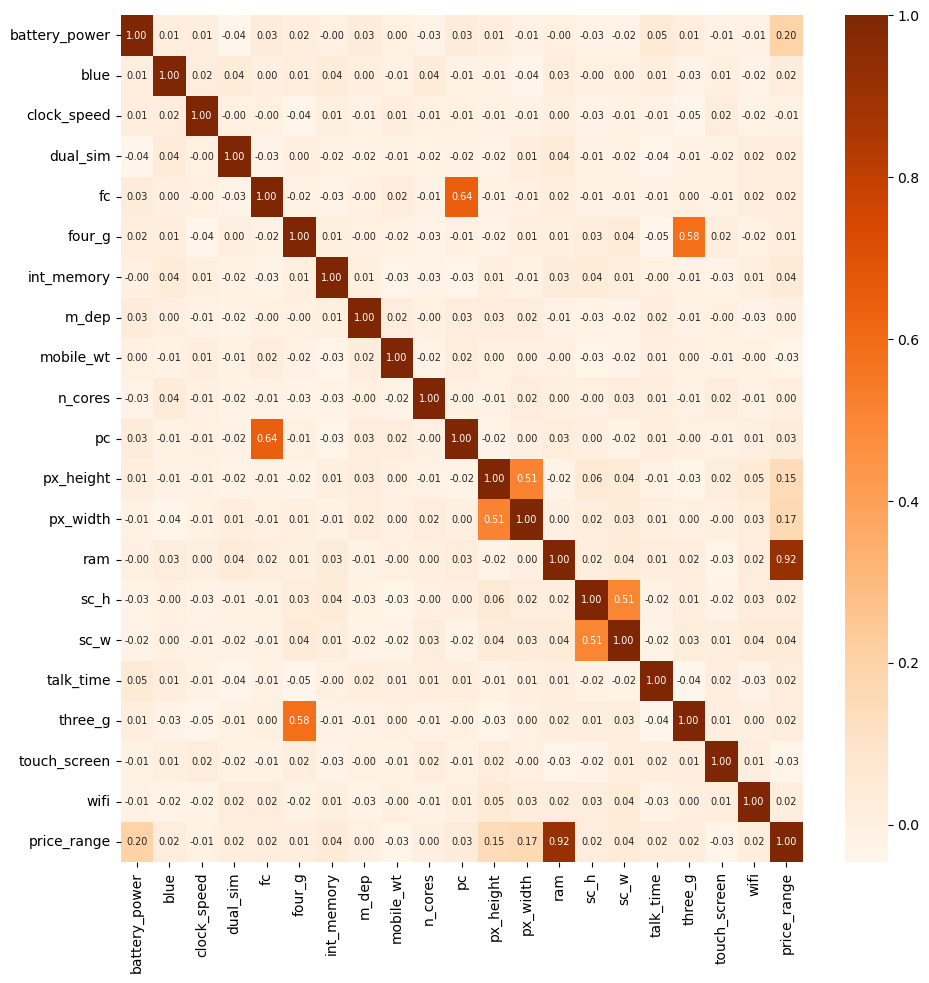

In [30]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr(), cmap="Oranges", annot=True, fmt='0.2f', annot_kws={'fontsize':7})
plt.show()

In [31]:
def plot_confusion_matrix(cm, classes, normalize=False):
    plt.figure(figsize=(6,6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Greens)
    plt.title('Confusion matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')

dict_characters = {0: 'low cost', 1: 'medium', 2: 'high', 3: 'very high'}

### CREATE MODEL

In [32]:
df3 = df.copy()

In [33]:
X = df3.drop(columns=['price_range']).values
y = df3['price_range'].values

In [34]:
# as the min of test set might be lower than train set, we can't just normalize the train and then transform it to test, 
# we normalize the whole X and then split
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

<span style="color: green; font-size: 28px">Desicion Tree</span><br><br>

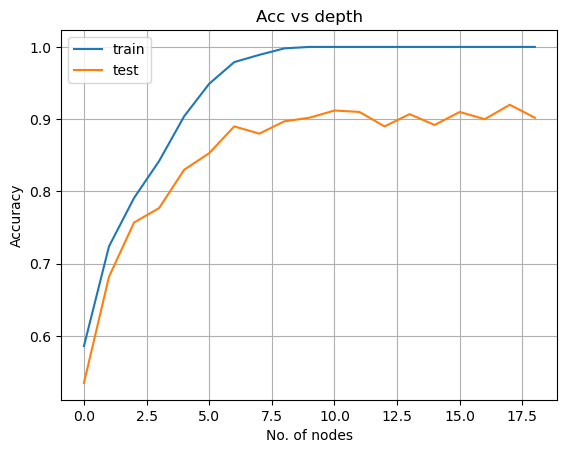

In [35]:
train_list, test_list = [], []
for i in range(1, 20):
    DT_model = RandomForestClassifier(criterion='entropy', max_depth=i)
    DT_model.fit(X_train, y_train)
    train_list.append(round(DT_model.score(X_train, y_train), 3))
    test_list.append(round(DT_model.score(X_test, y_test), 3))
plt.plot(train_list, label='train')
plt.plot(test_list, label='test')
plt.title('Acc vs depth')
plt.ylabel('Accuracy')
plt.xlabel('No. of nodes')
plt.legend()
plt.grid()
plt.show()

In [36]:
train_list, test_list, depth_list, max_features_list = [], [], [], []
for d in range(5, 15):
    for mf in ['sqrt', 'log2', None]:
        DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=d, random_state=0)
        DT_model.fit(X_train, y_train)
        y_pred = DT_model.predict(X_test)
        train_list.append(round(DT_model.score(X_train, y_train), 3))
        test_list.append(round(DT_model.score(X_test, y_test), 3))
        depth_list.append(d)
        max_features_list.append(mf)
output = pd.DataFrame({'train': train_list, 'test': test_list, 'depth': depth_list, 'max_features': max_features_list})

In [37]:
output.style.highlight_max(color = 'lightgreen', axis = 0, subset=['train', 'test'])

### Just a quick check, Everything seems OK with CV

In [38]:
result = cross_val_score(DT_model, X, y, cv=KFold(8))
print(result)
print(np.mean(result))

[0.884 0.868 0.868 0.828 0.824 0.856 0.872 0.86 ]
0.8574999999999999


<span style="color: green; font-size: 28px">Random Forest</span><br><br>

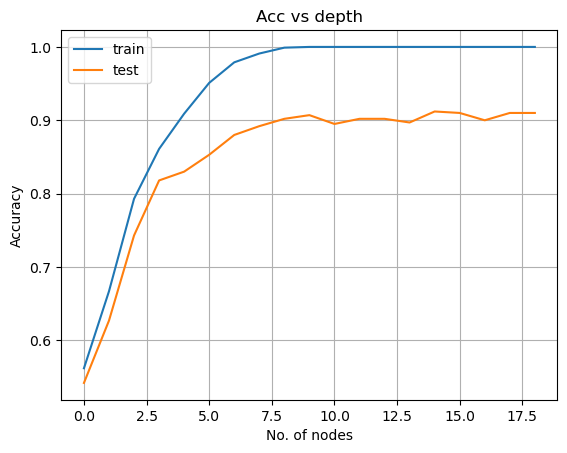

In [39]:
train_list, test_list = [], []
for i in range(1, 20):
    RF_model = RandomForestClassifier(criterion='entropy', max_depth=i, n_estimators=150)
    RF_model.fit(X_train, y_train)
    y_pred = RF_model.predict(X_test)
    train_list.append(round(RF_model.score(X_train, y_train), 3))
    test_list.append(round(RF_model.score(X_test, y_test), 3))
plt.plot(train_list, label='train')
plt.plot(test_list, label='test')
plt.title('Acc vs depth')
plt.ylabel('Accuracy')
plt.xlabel('No. of nodes')
plt.legend()
plt.grid()
plt.show()

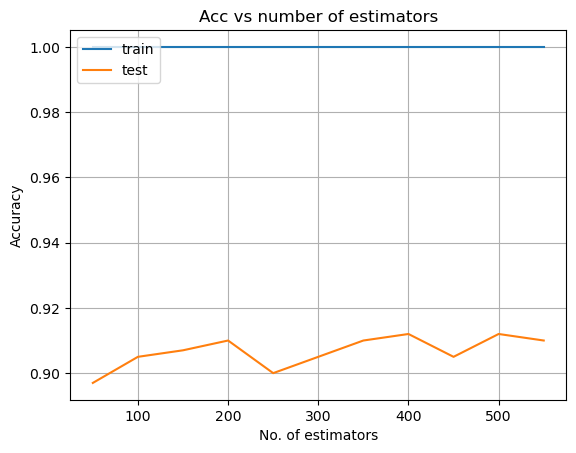

In [40]:
train_list, test_list = [], []
for i in range(50, 600, 50):
    RF_model = RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=i)
    RF_model.fit(X_train, y_train)
    y_pred = RF_model.predict(X_test)
    train_list.append(round(RF_model.score(X_train, y_train), 3))
    test_list.append(round(RF_model.score(X_test, y_test), 3))
plt.plot(range(50, 600, 50), train_list, label='train')
plt.plot(range(50, 600, 50), test_list, label='test')
plt.title('Acc vs number of estimators')
plt.ylabel('Accuracy')
plt.xlabel('No. of estimators')
plt.legend()
plt.legend(loc='upper left')
plt.grid()
plt.show()

In [41]:
train_list, test_list, depth_list, estimators_list, max_features_list = [], [], [], [], []
for d in range(8, 15):
    for e in range(50, 600, 50):
        for mf in ['sqrt', 'log2', None]:
            RF_model = RandomForestClassifier(criterion='entropy', max_depth=d, n_estimators=e, max_features=mf, random_state=2)
            RF_model.fit(X_train, y_train)
            train_list.append(round(RF_model.score(X_train, y_train), 3))
            test_list.append(round(RF_model.score(X_test, y_test), 3))
            estimators_list.append(e)
            depth_list.append(d)
            max_features_list.append(mf)
output = pd.DataFrame({'train': train_list, 'test': test_list, 'depth': depth_list, 'estimators': estimators_list, 'max_features': max_features_list})

In [42]:
output.style.highlight_max(color = 'lightgreen', axis = 0, subset=['train', 'test'])

<span style="color: green; font-size: 28px">SVM</span><br><br>

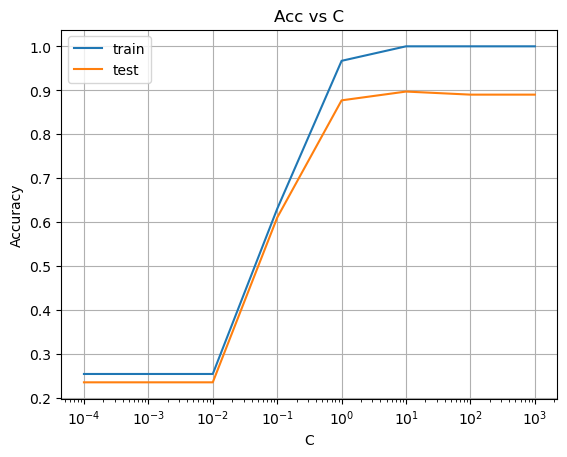

In [43]:
train_list, test_list = [], []
c_range = np.logspace(np.log10(0.0001), np.log10(1000), num=8)
for i in c_range:
    SVM_model = SVC(kernel='rbf', C=i)
    SVM_model.fit(X_train, y_train)
    y_pred = SVM_model.predict(X_test)
    train_list.append(round(SVM_model.score(X_train, y_train), 3))
    test_list.append(round(SVM_model.score(X_test, y_test), 3))
plt.semilogx(c_range, train_list, label='train')
plt.semilogx(c_range, test_list, label='test')
plt.title('Acc vs C')
plt.ylabel('Accuracy')
plt.xlabel('C')
plt.legend()
plt.legend(loc='upper left')
plt.grid()
plt.show()

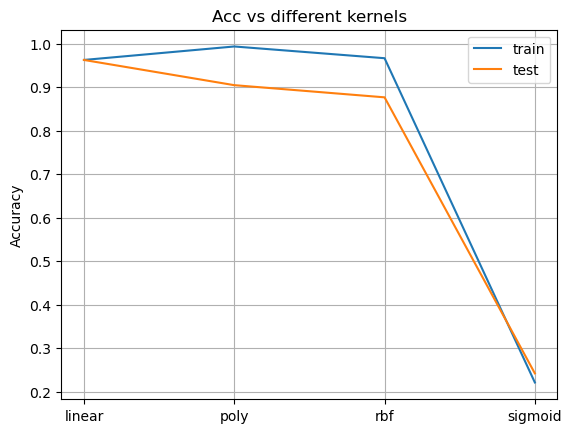

In [44]:
train_list, test_list = [], []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    SVM_model = SVC(kernel=i, C=1)
    SVM_model.fit(X_train, y_train)
    y_pred = SVM_model.predict(X_test)
    train_list.append(round(SVM_model.score(X_train, y_train), 3))
    test_list.append(round(SVM_model.score(X_test, y_test), 3))
plt.plot(kernels, train_list, label='train')
plt.plot(kernels, test_list, label='test')
plt.title('Acc vs different kernels')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.legend(loc='upper right')
plt.show()

## we saw how each parameter can have its own impact on the output accuracy, but let's write a loop to test each 4 kernels with a reasonable range of C, to observe which one gives the best Test accuracy

In [45]:
train_list, test_list, kernel_list, c_list = [], [], [], []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
c_range = np.logspace(np.log10(0.0001), np.log10(1000), num=8)
for k in kernels:
    for c in c_range:
        SVM_model = SVC(kernel=k, C=c)
        SVM_model.fit(X_train, y_train)
    #     y_pred = SVM_model.predict(X_test)
        train_list.append(round(SVM_model.score(X_train, y_train), 3))
        test_list.append(round(SVM_model.score(X_test, y_test), 3))
        kernel_list.append(k)
        c_list.append(c)
output = pd.DataFrame({'train': train_list, 'test': test_list, 'Kernel': kernel_list, 'C': c_list})

In [46]:
output.style.highlight_max(color = 'lightgreen', axis = 0, subset=['train', 'test'])

<span style="color: Blue; font-size: 28px">Comparing 3 models</span><br><br>

Decision Tree accuracy: 0.8925


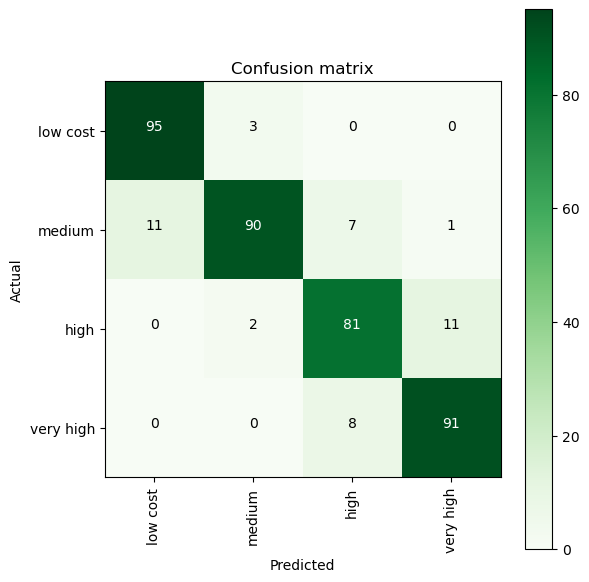

In [47]:
DT_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=0)
DT_model.fit(X_train, y_train)
y_pred = DT_model.predict(X_test)
print(f'Decision Tree accuracy: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=list(dict_characters.values()))

Random Forest accuracy: 0.9175


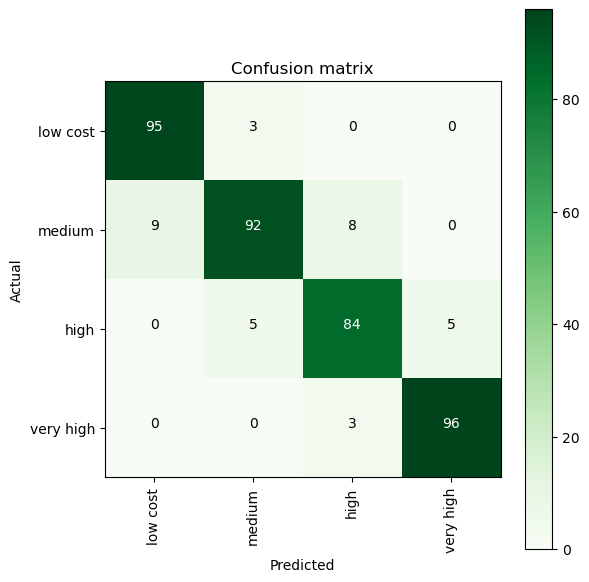

In [48]:
RF_model = RandomForestClassifier(criterion='entropy', max_depth=12, n_estimators=400, random_state=4)
RF_model.fit(X_train, y_train)
y_pred = RF_model.predict(X_test)
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=list(dict_characters.values()))

SVM accuracy: 0.975


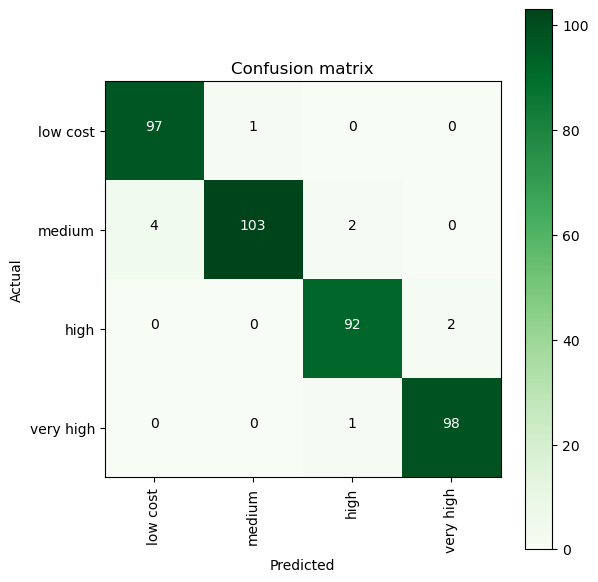

In [49]:
SVM_model = SVC(kernel='linear', C=100)
SVM_model.fit(X_train, y_train)
y_pred = SVM_model.predict(X_test)
print(f'SVM accuracy: {accuracy_score(y_test, y_pred)}')
plot_confusion_matrix(confusion_matrix(y_test, y_pred), classes=list(dict_characters.values()))

In [52]:
print(df_test.columns)

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')


In [70]:
df_test = pd.DataFrame(pd.read_csv('datasets_11167_15520_train.csv'))
df_test['price_range'] = -100

In [71]:
X_df_test = df_test.drop(columns=['price_range']).values
y_df_test = df_test['price_range'].values

In [72]:
scaler2 = MinMaxScaler()
X_test_scaled = scaler2.fit_transform(X_df_test)
y_pred_DT = DT_model.predict(X_test_scaled)
y_pred_RF = RF_model.predict(X_test_scaled)
y_pred_SVM = SVM_model.predict(X_test_scaled)
df_test['y_pred_DT'] = y_pred_DT
df_test['y_pred_RF'] = y_pred_RF
df_test['y_pred_SVM'] = y_pred_SVM
df_test.drop(columns=['price_range'], inplace=True)

In [76]:
from scipy.stats import mode

df_test['most_voted'] = mode(df_test[['y_pred_DT', 'y_pred_RF', 'y_pred_SVM']], axis=1).mode.flatten()


### As expected SVM has the most similarity to the Ensemble model and Decision Tree has the least

In [77]:
len(df_test[df_test['most_voted'] != df_test['y_pred_DT']])

27

In [78]:
len(df_test[df_test['most_voted'] != df_test['y_pred_RF']])

21

In [79]:
len(df_test[df_test['most_voted'] != df_test['y_pred_SVM']])

43

In [80]:
df_test

battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  \
0               842     0          2.2         0   1       0           7   
1              1021     1          0.5         1   0       1          53   
2               563     1          0.5         1   2       1          41   
3               615     1          2.5         0   0       0          10   
4              1821     1          1.2         0  13       1          44   
...             ...   ...          ...       ...  ..     ...         ...   
1995            794     1          0.5         1   0       1           2   
1996           1965     1          2.6         1   0       0          39   
1997           1911     0          0.9         1   1       1          36   
1998           1512     0          0.9         0   4       1          46   
1999            510     1          2.0         1   5       1          45   

      m_dep  mobile_wt  n_cores  ...  sc_h  sc_w  talk_time  three_g  \
0       0.6        188        2  ...     9     7         19        0   
1       0.7        136        3  ...    17     3          7        1   
2       0.9        145        5  ...    11     2          9        1   
3       0.8        131        6  ...    16     8         11        1   
4       0.6        141        2  ...     8     2         15        1   
...     ...        ...      ...  ...   ...   ...        ...      ...   
1995    0.8        106        6  ...    13     4         19        1   
1996    0.2        187        4  ...    11    10         16        1   
1997    0.7        108        8  ...     9     1          5        1   
1998    0.1        145        5  ...    18    10         19        1   
1999    0.9        168        6  ...    19     4          2        1   

      touch_screen  wifi  y_pred_DT  y_pred_RF  y_pred_SVM  most_voted  
0                0     1          1          1           1           1  
1                1     0          2          2           2           2  
2                1     0          2          2           2           2  
3                0     0          3          2           2           2  
4                1     0          1          1           1           1  
...            ...   ...        ...        ...         ...         ...  
1995             1     0          0          0           0           0  
1996             1     1          2          2           2           2  
1997             1     0          3          3           3           3  
1998             1     1          0          0           0           0  
1999             1     1          3          3           3           3  

[2000 rows x 24 columns]

In [81]:
df_test.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

              sc_h         sc_w    talk_time      three_g  touch_screen  \
count  2000.000000  2000.000000  2000.000000  2000.000000   2000.000000   
mean     12.306500     5.767000    11.011000     0.761500      0.503000   
std       4.213245     4.356398     5.463955     0.426273      0.500116   
min       5.000000     0.000000     2.000000     0.000000      0.000000   
25%       9.000000     2.000000     6.000000     1.000000      0.000000   
50%      12.000000     5.000000    11.000000     1.000000      1.000000   
75%      16.000000     9.000000    16.000000     1.000000      1.000000   
max      19.000000    18.000000    20.000000     1.000000      1.000000   

              wifi    y_pred_DT    y_pred_RF   y_pred_SVM   most_voted  
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  
mean      0.507000     1.501000     1.499500     1.503500     1.499000  
std       0.500076     1.123668     1.121886     1.120543     1.120101  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       1.000000     2.000000     2.000000     2.000000     2.000000  
75%       1.000000     3.000000     3.000000     3.000000     2.250000  
max       1.000000     3.000000     3.000000     3.000000     3.000000  

[8 rows x 24 columns]

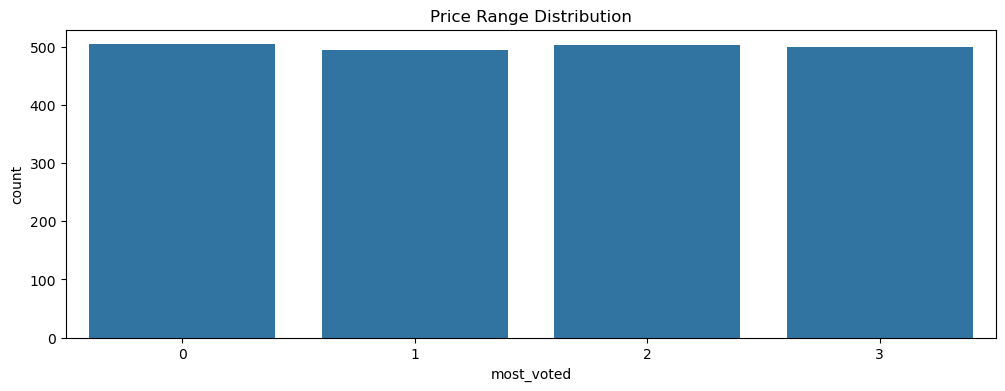

In [82]:
plt.figure(figsize=(12,4))
sns.countplot(x='most_voted', data=df_test)
plt.xticks(rotation=0)
plt.title('Price Range Distribution')
plt.show()